In [1]:
from groundino_samnet.gsam_combined import GSamNetwork

c:\Users\WilhelmB\miniconda3\envs\DiagAI2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = GSamNetwork("SAM1","vit_h")

Notice: Loading GroundDINO model


final text_encoder_type: bert-base-uncased
SAM1 selected: a versatile model for object segmentation in images.
Notice: Loading the vit_h model


In [3]:
from DataSets.Mamitas_Thermal_Dataset.Mamitas_Dataset import Mamitas_Thermal_Feet_Dataset, ToBoolTensor, PermuteTensor
from Metrics.Metrics import Metrics 
from torchvision.transforms import transforms
import torch

In [4]:
transform_mask = transforms.Compose([
    ToBoolTensor(),
    PermuteTensor((1,2,0))
])
transform_img = transforms.Compose([
    transforms.ToTensor(),
    transforms.ConvertImageDtype(torch.uint8),
    PermuteTensor((1,2,0))
])
dataset = Mamitas_Thermal_Feet_Dataset(credentials_path="C:\\Users\\WilhelmB\\Documents\\DiagAssistAI\\src\\DataSets\\Mamitas_Thermal_Dataset\\kaggle.json")
_, val_dataset = dataset.generate_dataset_with_val(torch_dataset=True,
                                                   batch_size=38,
                                                   shuffle=False,
                                                   split_val=0.2,
                                                   merge_image=True,
                                                   transform_mask=transform_mask,
                                                   transform_img=transform_img)


DATASET = dataset.generate_dataset(torch_dataset=False,
                                   merge_image=True,
                                   transform_mask=transform_mask,
                                   transform_img=transform_img)

Dataset URL: https://www.kaggle.com/datasets/lucasiturriago/mamitas-thermal-feet
Train_dataset: 150
Val_dataset: 38


In [26]:
image, mask, id =DATASET.__getitem__(3)

In [28]:
boxes, logits, phrases = model.predict_dino(image=image,text_prompt="feet . foot",box_threshold=0.10,text_threshold=0.30,box_process_threshold=0.10)

In [29]:
mask = model.predict_SAM1(image=image,area_thresh=500,boxes=boxes)

a


In [11]:
import matplotlib.pyplot as plt

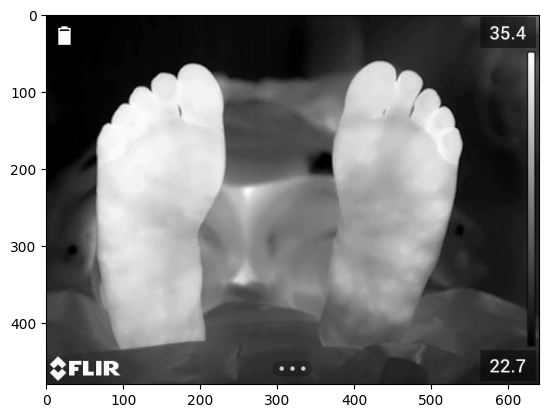

In [27]:
plt.imshow(image)

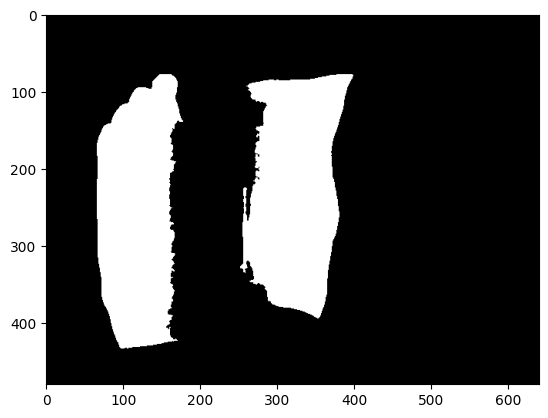

In [30]:
plt.imshow(mask,cmap='gray')

In [55]:
images = []
idss = []
for data in val_dataset:
  for i in range(len(data[0])):
    img = data[0][i]
    mask_org = data[1][i]
    id = data[2][i]
    images.append(img.numpy())
    idss.append(id)


In [32]:
boxess, logitss, phrasess = model.predict_dino_batch(images=images,text_prompt="feet . foot",box_threshold=0.10,text_threshold=0.30,box_process_threshold=0.10)

In [34]:
masks = model.predict_SAM1_batch(images=images,boxes=boxess,area_thresh=500)

a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a


In [35]:
len(masks)

38

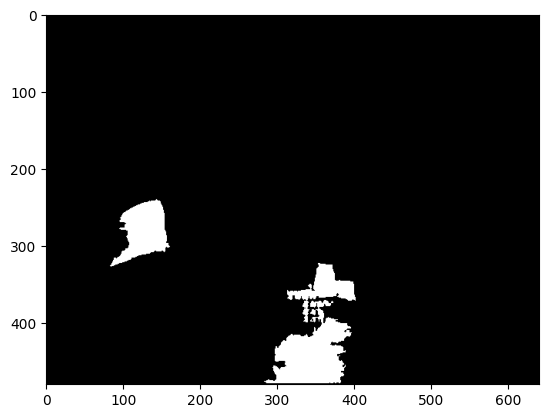

In [65]:
plt.imshow(masks[9],cmap='gray')

In [52]:
from groundino_samnet.visuals import plot_grid

In [62]:
args = {"imag_max": 38}

SyntaxError: invalid syntax (82047634.py, line 1)

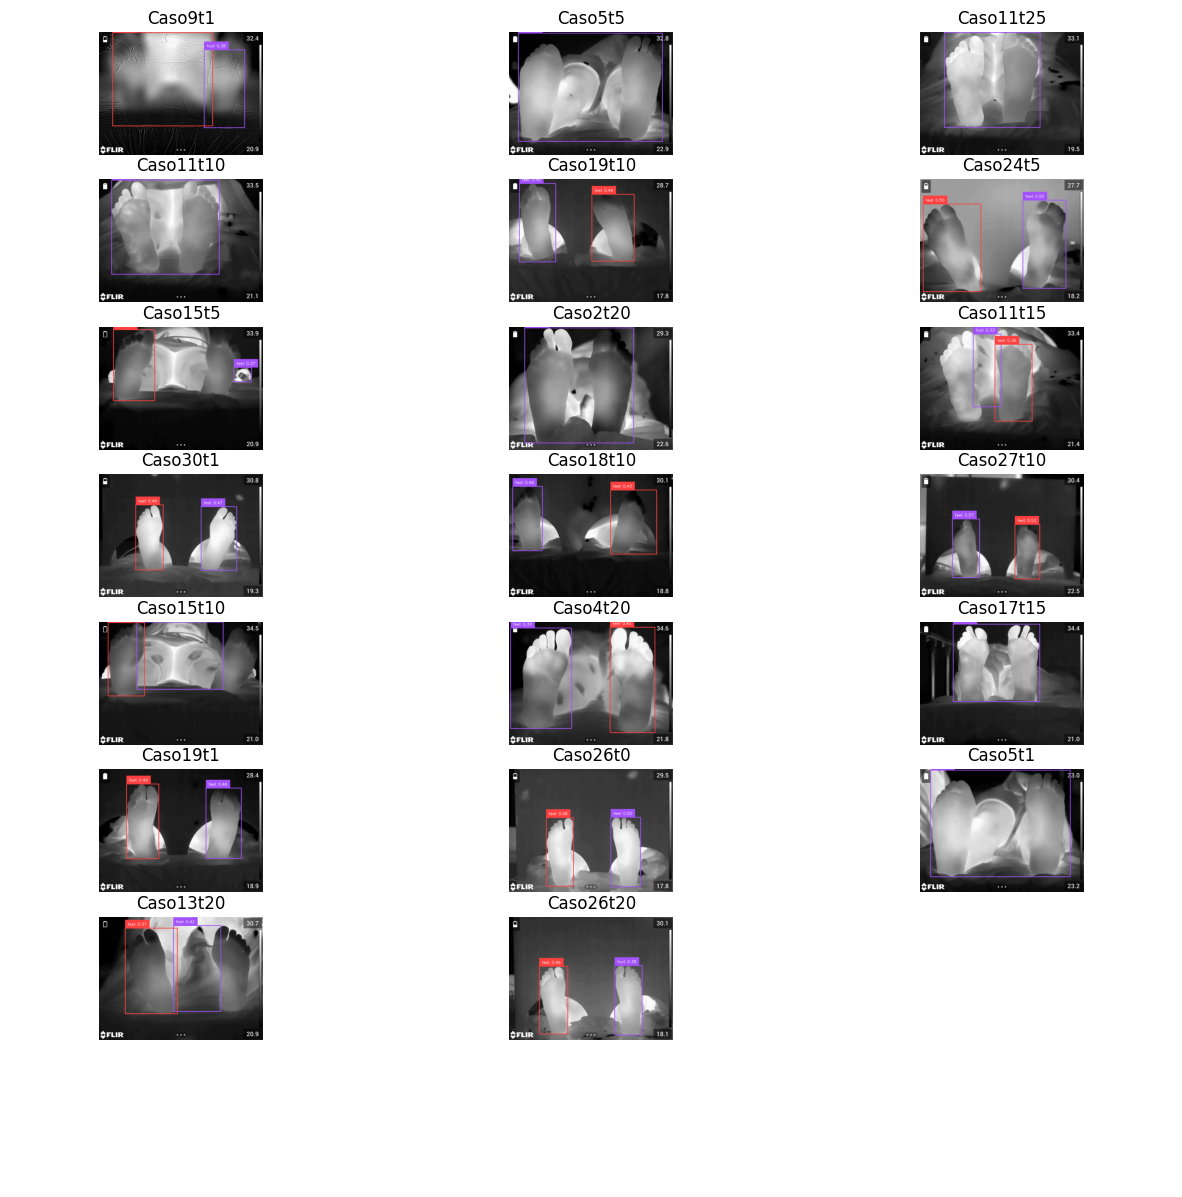

In [64]:
plot_grid(images,idss,boxess,logitss,phrasess)

In [7]:
from groundino_samnet.utils import PostProcessor

In [ ]:
PostProcessor.postprocess_box()

In [5]:
model2 = GSamNetwork("SAM2","sam2_t")

Notice: Loading GroundDINO model
final text_encoder_type: bert-base-uncased
SAM2 selected: optimized for images and videos, offering improved object segmentation performance.
Notice: Loading the sam2_t model
An error occurred while loading the SAM2 model 'sam2_t': Error downloading or Compile sam2_t model. Please ensure that facebook/sam2-hiera-tiny is functional.


To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development


In [3]:
from segment_anything2.config import SAM2_MODELS

In [4]:
SAM2_MODELS

{'sam2_t': 'facebook/sam2-hiera-tiny',
 'sam2_s': 'facebook/sam2-hiera-small',
 'sam2_b_plus': 'facebook/sam2-hiera-base-plus',
 'sam2_l': 'facebook/sam2-hiera-large'}